In [74]:
import os 
# Ścieżka dostępu do katalogu
os.chdir("D:\LasVegas")
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
plt.style.use('ggplot')

In [75]:
#Wczytywanie pliku cvs
df = pd.read_csv("Immunotherapy.csv")
df


,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1
5,1,15,5.00,3,3,84,7,1
6,1,35,9.75,2,2,8,6,1
7,2,28,7.50,4,1,9,2,1
8,2,19,6.00,2,1,225,8,1
9,2,32,12.00,6,3,35,5,0


In [76]:
# Transformacja danych
df = df.apply(pd.to_numeric)
df_array = df.as_matrix()

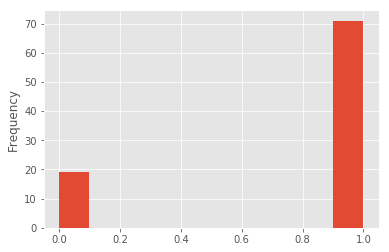

In [77]:
df.Result_of_Treatment.plot('hist')
plt.show()

In [78]:
# Podział zbioru danych na podzbiory X oraz y (atrybuty, klasy)
X_train, X_test, y_train, y_test = train_test_split(df_array[:,:7],
                                                    df_array[:,7],
test_size=0.3)

# MLP Klasyfikator

 Budowanie oraz uczenie modelu na danych uczących (Wielowarstwowy model perceptronowy z jedną ukrytą warstwą)

 Wejsciowa warstwa: 7 neuronów(7 atrybutów) 

Jedna ukryta warstwa

Wyjściowa warstwa z 2 neuronów,reprezentujących klasy Result_of_Treatment[1,0]

In [79]:
mlp = MLPClassifier(hidden_layer_sizes=(10),solver='sgd',learning_rate_init=0.01,max_iter=500)


In [80]:
# Uczenia modelu 
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [81]:
#testowanie
test = pd.read_csv("Imm_test.csv")
test

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,2,33,8.00,3,1,502,8,1
1,1,34,5.00,7,3,64,7,0
2,2,41,11.00,11,2,21,6,0
3,1,29,8.75,3,1,504,2,1
4,2,22,8.50,5,1,99,8,1
5,1,45,11.25,4,1,72,5,0
6,2,22,8.25,9,1,352,3,1
7,1,35,8.75,10,2,69,7,1
8,2,34,8.50,1,2,163,7,0


In [82]:
#Ocena poprawnosci klasyfikatora
print (mlp.score(X_test, y_test))

0.7407407407407407


In [83]:
#Predykcja
print (mlp.predict(X_test))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


In [84]:
test = test.apply(pd.to_numeric)
t_array = test.as_matrix()

In [85]:
print (mlp.predict(t_array[:,:7]))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [86]:
X = t_array[:,:7]
y = t_array[:,7]

In [87]:
#_ = pd.plotting.scatter_matrix(df, c = X, figsize = [8, 8], s =150, marker ='D')

# KNN klasyfikator

In [88]:
knn = KNeighborsClassifier(n_neighbors=8)

In [89]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [90]:
y_pred = knn.predict(X_test)

In [91]:
print("Test set prediction:\n {}".format(y_pred))

Test set prediction:
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1.]


In [92]:
knn.score(X_test, y_test)

0.5925925925925926

# Drzewo decyzyjne

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

In [94]:
print(dtree_model.score(X_test, y_test))

0.7407407407407407


# GaussianNB

In [95]:
# from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy on X_test
accuracyNB = gnb.score(X_test, y_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

In [96]:
print(accuracyNB)
 

0.7777777777777778


In [97]:
gnb_predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])